# Clusterization FIFA - 2019

Nesse trabalho utilizamos o dataset do fifa 2019, https://www.kaggle.com/karangadiya/fifa19
O nosso objetivo foi cluterizar o dataset verifacando através de suas features as habilidades
de cada componente de cada cluster. Com isso foi possível idenficar a posiçao em cada um joga ,
o valor desses jogadores e suas estatisticas.

Grupo:
    Emerson, Nilson

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
fifa = pd.read_csv('asset-v1_IRONHACK+DAFT+201911_SAO+type@asset+block@fifa19.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
fifa.drop(labels=['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club', 'Club Logo'],axis=1, inplace=True)

In [5]:
fifa.shape

(18207, 83)

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 83 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-nul

In [7]:
fifa['Age'].dtypes in ('float64', 'int64')

True

In [8]:
col_names = fifa.columns

In [9]:
col_names

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPosition

In [10]:
X_unscaled = pd.DataFrame()

In [11]:
for col in col_names:
    if fifa[col].dtypes in ('float64', 'int64'):
        X_unscaled[col] = fifa[col]

In [12]:
X_unscaled.shape

(18207, 42)

In [13]:
X_unscaled.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [14]:
X_unscaled.dropna(inplace=True)

In [15]:
X_unscaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 42 columns):
Age                         18147 non-null int64
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Special                     18147 non-null int64
International Reputation    18147 non-null float64
Weak Foot                   18147 non-null float64
Skill Moves                 18147 non-null float64
Jersey Number               18147 non-null float64
Crossing                    18147 non-null float64
Finishing                   18147 non-null float64
HeadingAccuracy             18147 non-null float64
ShortPassing                18147 non-null float64
Volleys                     18147 non-null float64
Dribbling                   18147 non-null float64
Curve                       18147 non-null float64
FKAccuracy                  18147 non-null float64
LongPassing                 18147 non-null float64
BallControl                 1814

In [16]:
features = X_unscaled.columns

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#Devido a vari'avel Special dominar a escala , foi necessário normaliar (trazer para mesma escala)
scaler = StandardScaler()
scaler.fit(X_unscaled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
# X normalizado (features na mesma escala)
X = scaler.transform(X_unscaled)

In [20]:
from sklearn.cluster import KMeans

C:\Users\emers\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


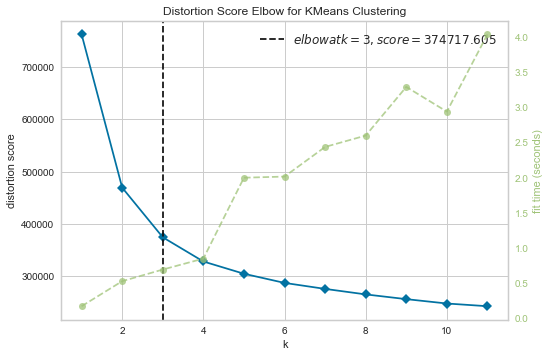

In [37]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X)
visualizer.show()

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
from collections import Counter

In [23]:
Counter(kmeans.labels_)

Counter({1: 5626, 2: 2025, 0: 5601, 3: 4895})

In [24]:
# muitas dimensões para plotar
X.shape

(18147, 42)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca= PCA(n_components=2)

In [27]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
#reduziando para duas dimensões
component=pca.transform(X)
component

array([[-10.1789619 ,  -4.92504556],
       [-10.22801172,  -3.42727212],
       [ -9.73254577,  -5.04021196],
       ...,
       [  3.59454526,  -2.92676433],
       [  3.49062286,  -2.86798884],
       [  3.02411179,   0.2603615 ]])

In [29]:
component.shape

(18147, 2)

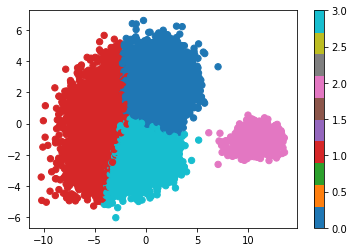

In [30]:
plt.scatter(component[:, 0], component[:, 1], s=40, c=kmeans.labels_, cmap='tab10');
plt.colorbar()

In [31]:
#Visualização do peso das features , note que variável Special estava realmente distorcendo a distribuição
pd.DataFrame(list(zip(pca.components_[1], features)), columns=['PC1','Features']).sort_values(by='PC1', ascending=True)

,PC1,Features
9,-0.210665,Finishing
12,-0.165909,Volleys
20,-0.158471,Agility
30,-0.143439,Positioning
22,-0.139927,Balance
32,-0.137822,Penalties
31,-0.134734,Vision
27,-0.133391,LongShots
18,-0.129898,Acceleration
6,-0.120298,Skill Moves


In [32]:
pca.components_[0]

array([-0.02726772, -0.10266888, -0.07232622, -0.21077898, -0.05148872,
       -0.08012646, -0.17955095,  0.02010707, -0.19092563, -0.17175992,
       -0.15442682, -0.20141598, -0.1778782 , -0.20352124, -0.18821297,
       -0.17574221, -0.17898349, -0.21004973, -0.15501528, -0.15314572,
       -0.15896133, -0.10249227, -0.1373488 , -0.18824751, -0.05851027,
       -0.17507256, -0.02879038, -0.1877399 , -0.13856711, -0.10996243,
       -0.19109012, -0.1587219 , -0.17267039, -0.15379004, -0.1161694 ,
       -0.10938638, -0.10223722,  0.18015663,  0.17986809,  0.17914943,
        0.1790723 ,  0.17996475])

In [33]:
X_unscaled['cluster'] = kmeans.labels_

In [34]:
X_unscaled.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,cluster
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,2
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1


In [35]:
X_unscaled.groupby('cluster').mean().T

cluster,0,1,2,3
Age,24.605249,27.095805,26.043457,23.060266
Overall,63.927156,72.150196,64.603457,62.822268
Potential,69.664524,74.580697,69.799012,70.110930
Special,1539.592037,1874.923214,1046.204938,1574.834729
International Reputation,1.028745,1.298436,1.095802,1.004494
Weak Foot,2.789323,3.190366,2.489877,3.037385
Skill Moves,2.056418,2.976715,1.000000,2.566701
Jersey Number,18.379754,16.666726,20.516543,23.788560
Crossing,45.921443,65.223249,14.257284,50.986721
Finishing,32.572219,58.993779,12.016296,58.821450


In [36]:
# Jogadores referente ao cluster 2 .
fifa.loc[X_unscaled.query('cluster == 2').index, :]

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,De Gea,27,Spain,91,93,€72M,€260K,1471,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,J. Oblak,25,Slovenia,90,93,€68M,€94K,1331,Right,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,M. ter Stegen,26,Germany,89,92,€58M,€240K,1328,Right,3.0,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,T. Courtois,26,Belgium,89,90,€53.5M,€240K,1311,Left,4.0,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,M. Neuer,32,Germany,89,89,€38M,€130K,1473,Right,5.0,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
37,H. Lloris,31,France,88,88,€36M,€150K,1335,Left,4.0,...,65.0,29.0,10.0,18.0,88.0,84.0,68.0,83.0,92.0,€66.6M
40,S. Handanovič,33,Slovenia,88,88,€30M,€110K,1262,Right,3.0,...,69.0,25.0,10.0,13.0,87.0,86.0,69.0,89.0,89.0,€51M
41,G. Buffon,40,Italy,88,88,€4M,€77K,1334,Right,4.0,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
46,K. Navas,31,Costa Rica,87,87,€30.5M,€195K,1345,Right,3.0,...,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,€62.5M
57,Ederson,24,Brazil,86,90,€41.5M,€125K,1463,Left,2.0,...,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M
